In [1]:
import re
import json
import uuid
import glob
import pickle
import sys
import os
import math
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.cluster import KMeansClusterer, euclidean_distance
from numpy import array
from pprint import pprint
import re
import scipy.stats as stat
from os.path import basename
import string
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import operator
from nltk import stem
from nltk.stem.snowball import *
from nltk.stem import PorterStemmer
import datetime
import time
from pprint import pprint
from gensim.corpora.dictionary import Dictionary

%matplotlib inline

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import os

# Enable logging for gensim - optional
import logging
logging.basicConfig(filename='lda_model_Parenting.log',format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")


def Tokinization(document):
    document = "".join(document)
    tokenizer = RegexpTokenizer(r'\w+')
    intermediate = tokenizer.tokenize(document)
    return intermediate


/Users/tammari/Desktop/DaskTest/env/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df= pd.read_pickle('Mizo_LDA_70_Topics.pkl')

In [3]:
#Creating a Daddit Data Frame
Daddit = df[df['subreddit']=='daddit']

In [4]:
#Creating a Mommit Data Frame
Mommit = df[df['subreddit']=='Mommit']

In [10]:
print('reading the Daddit Cleaned dataframe...')
print('*' * 50)
print('and for a test...')
print(Daddit.clean_body.head())
print('*' * 50)

reading the Daddit Cleaned dataframe...
**************************************************
and for a test...
1037029                                  silli day like nice
1037030                       hmm mean need scale back silli
1037031    boy luck nice move exampl take moment offer pr...
1037032                        least day much count unintent
1037033                           could probabl get day work
Name: clean_body, dtype: object
**************************************************


In [11]:
print('grouping into dcouments')
CompleteThread = []
CompleteThread = Daddit.groupby('link_id')['clean_body'].apply(list)
#running for the rest of the data
processed_threads = []
#creating threads for each of the users
for thread in CompleteThread:
    #Preprocessing each of the threads
    processed_threads.append(Tokinization(thread))

grouping into dcouments


In [12]:
texts = processed_threads
print('The length of the documents is...')
print(len(texts))
print('*' * 50)
print('the first document is...')
print(texts[0])
print('*' * 50)

print('buiding the dictionary...')
dictionary = corpora.Dictionary(texts)
dictionary.save('DadditDictionary.dict')
print(dictionary[0])

print('building the corpus')
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('DadditCorpusFinal.mm', corpus)
print(corpus[0])

The length of the documents is...
44730
**************************************************
the first document is...
['congratul', 'ee', 'goodbeauti', 'babi', 'congrat']
**************************************************
buiding the dictionary...
babi
building the corpus
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [15]:
print('reading all LDA models....')
print('*' * 50)

model_list =  []

coherence_values = []

for i in range(0, len(model_list)):
    print('now working on coherence value for model...')
    print(model_list[i])
    print('*' * 50)
    coherencemodel = CoherenceModel(model=model_list[i], texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

reading all LDA models....
**************************************************


In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
from gensim.models import LdaModel
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=10, limit=100, step=10)

/Users/tammari/Desktop/DaskTest/env/lib/python3.6/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/tammari/Desktop/DaskTest/env/lib/python3.6/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


[(70, (90, 0.45507055464394863)), (40, (80, 0.47193974476475054)), (10, (70, 0.4855468327726064)), (50, (60, 0.46377945867955206)), (60, (50, 0.4605282992545867)), (30, (40, 0.47508608717363676)), (80, (30, 0.4380515627620837)), (20, (20, 0.47824322359635907)), (90, (10, 0.3842091286860035))]
**************************************************
saving list...
**************************************************
creating a graph of the coherence model...
**************************************************


/Users/tammari/Desktop/DaskTest/env/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


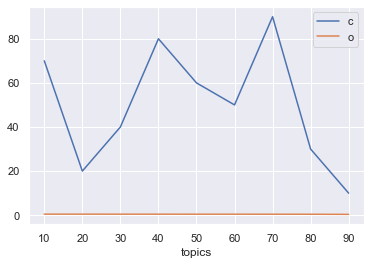

In [21]:
limit = 100
start = 10
step  = 10    

x = range(start, limit, step)
coherence = zip(x, coherence_values)
sorted_coherence = sorted(coherence, key=lambda x: x[1], reverse=True)

print(sorted_coherence)
print('*' * 50)

#for m, cv in sorted_coherence:
#    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
print('saving list...')
print('*' * 50)
with open("daddit_cohere.pkl", "wb") as fp: 
    pickle.dump(sorted_coherence, fp)
    
print('creating a graph of the coherence model...')
print('*' * 50)

# Show graph
fig = plt.gcf()
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("topics")
#plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='left')
fig.savefig('Daddit_LDA_models_coherence.png')

In [20]:
for i in range(0,len(model_list)):
    model_list[i].save('Daddit_Model'+str(i)+".model")

In [5]:
with open('Daddit_cohere.pkl', 'rb') as f:
    coherence_values = pickle.load(f)

In [6]:
coherence_values

[(90, 0.45507055464394863),
 (80, 0.47193974476475054),
 (70, 0.4855468327726064),
 (60, 0.46377945867955206),
 (50, 0.4605282992545867),
 (40, 0.47508608717363676),
 (30, 0.4380515627620837),
 (20, 0.47824322359635907),
 (10, 0.3842091286860035)]

In [30]:
with open("daddit_cohere.pkl", "wb") as fp: 
    pickle.dump(coherence_values, fp)

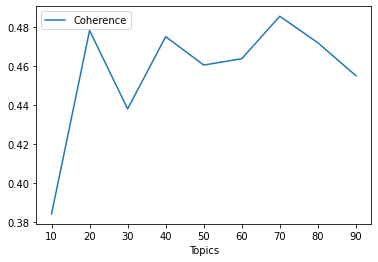

In [7]:
with open('Daddit_cohere.pkl', 'rb') as f:
    coherence_values = pickle.load(f)

df = pd.DataFrame.from_records(coherence_values, columns =['Topics', 'Coherence']) 

df = df.sort_values(by='Topics')

df.plot(x ='Topics', y='Coherence', kind = 'line')
plt.show()

In [8]:
#load LDA model
from gensim.models import LdaModel
from gensim import corpora, models
from gensim.corpora import Dictionary
optimal_model = LdaModel.load('Daddit_Model1.model')
dictionary = corpora.Dictionary.load('DadditDictionary.dict')
corpus = corpora.MmCorpus('DadditCorpusFinal.mm')

# Finding topic distributions accross df

In [10]:
#First, get a list of posts, one by one
df = Daddit.copy()
processed_posts = []
CompletePosts = df['clean_body'].apply(list)
#running for the rest of the data
processed_posts = []
#creating threads for each of the users
for post in CompletePosts:
    #Preprocessing each of the threads
    processed_posts.append(Tokinization(post))

In [11]:
new_doc2bow = [dictionary.doc2bow(post) for post in processed_posts]

vector = optimal_model.get_document_topics(new_doc2bow)

#create a list of dictioaries for scores relating to optimum LDA
newdictlist = []
for i in range(0, len(vector)):
    newdictlist.append(dict(vector[i]))

topic_bow = pd.DataFrame(newdictlist)

topic_bow.fillna(0, inplace=True)

topic_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.010001,0.010001,0.010001,0.010001,0.809973,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.516073,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.362836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266734,0.000000,0.000000,0.000000,0.000000,0.000000,0.313741,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.841274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.841662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440723,0.025002,0.025002,0.524964,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002
440724,0.000000,0.000000,0.415116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
440725,0.025002,0.025002,0.025002,0.025002,0.524969,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002
440726,0.016668,0.683301,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668


In [73]:
topic_bow.columns = ['Topic__' + str(col) for col in topic_bow.columns]

In [74]:
topic_bow

,Topic__Topic_0,Topic__Topic_1,Topic__Topic_2,Topic__Topic_3,Topic__Topic_4,Topic__Topic_5,Topic__Topic_6,Topic__Topic_7,Topic__Topic_8,Topic__Topic_9,Topic__Topic_10,Topic__Topic_11,Topic__Topic_12,Topic__Topic_13,Topic__Topic_14,Topic__Topic_15,Topic__Topic_16,Topic__Topic_17,Topic__Topic_18,Topic__Topic_19
0,0.010001,0.010001,0.010001,0.010001,0.809973,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.516073,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.362836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266734,0.000000,0.000000,0.000000,0.000000,0.000000,0.313741,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.841274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.841662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440723,0.025002,0.025002,0.524964,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002
440724,0.000000,0.000000,0.415116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
440725,0.025002,0.025002,0.025002,0.025002,0.524969,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002
440726,0.016668,0.683301,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668


In [75]:
Daddit.reset_index(drop=True, inplace=True)
topic_bow.reset_index(drop=True, inplace=True)
MizoFrame = pd.concat([Daddit, topic_bow], axis=1)

In [76]:
MizoFrame.columns.values

array(['archived', 'author', 'author_flair_css_class',
       'author_flair_text', 'body', 'controversiality', 'created_utc',
       'distinguished', 'downs', 'edited', 'gilded', 'link_id', 'name',
       'parent_id', 'removal_reason', 'score', 'score_hidden',
       'subreddit', 'ups', 'Throwaway_User', 'Throwaway_Body',
       'Throwaway', 'clean_body', 'Picky_Eaters', 'Sleep_Training',
       'Nursing', 'Dad_Support', 'Parenting_Jokes', 'Topic_5',
       'Smoke_Drugs_Alcohol', 'Topic_7', 'College', 'Grandparents',
       'Naked_Privacy', 'Allergy_Sick_Runny_Nose', 'Child_Food',
       'Parenting_Groups_Religious', 'Father_Role', 'Toys_Playing',
       'Diapers', 'Topic_17', 'After_First_Child', 'Child_Activity',
       'Baby_Gear', 'Psych_Stress', 'Parent_Gear',
       'Child_Autonomy_Str_Danger', 'Circumcision', 'Hair_Care',
       'Vaccines', 'Teen_Changes', 'BabyProof_Accidents', 'Swimming',
       'Moderator', 'School', 'Male_Norms', 'Birth', 'Joke', 'Dogs',
       'Diagnosing_D

In [78]:
MizoFrame[['Topic__Topic_0', 'Topic__Topic_1', 'Topic__Topic_2',
       'Topic__Topic_3', 'Topic__Topic_4', 'Topic__Topic_5',
       'Topic__Topic_6', 'Topic__Topic_7', 'Topic__Topic_8',
       'Topic__Topic_9', 'Topic__Topic_10', 'Topic__Topic_11',
       'Topic__Topic_12', 'Topic__Topic_13', 'Topic__Topic_14',
       'Topic__Topic_15', 'Topic__Topic_16', 'Topic__Topic_17',
       'Topic__Topic_18', 'Topic__Topic_19', 'body']]

,Topic__Topic_0,Topic__Topic_1,Topic__Topic_2,Topic__Topic_3,Topic__Topic_4,Topic__Topic_5,Topic__Topic_6,Topic__Topic_7,Topic__Topic_8,Topic__Topic_9,Topic__Topic_10,Topic__Topic_11,Topic__Topic_12,Topic__Topic_13,Topic__Topic_14,Topic__Topic_15,Topic__Topic_16,Topic__Topic_17,Topic__Topic_18,Topic__Topic_19,body
0,0.010001,0.010001,0.010001,0.010001,0.809973,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,&gt;Be silly once a day\n\nI like this. Nice.
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.516073,0.000000,Hmm...\n\nDoes that mean I need to scale back my silliness?
2,0.000000,0.000000,0.000000,0.000000,0.362836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266734,0.000000,0.000000,0.000000,0.000000,0.000000,0.313741,0.000000,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!"
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.841274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"I do this at least once a day, and much more if you count the unintentionals."
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.841662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,I could probably get it down to once a day if I work on it.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440723,0.025002,0.025002,0.524964,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,I’m not judging at all.
440724,0.000000,0.000000,0.415116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Like i said sounds good on paper but if you were to deal with what i deal with mentally and what I have to spend to be able to make it until tomorrow and knowing how i was as a parent and a husband and how she didnt ever have that life you'd understand. If i wanted to a could file the rest of my claims and get the hundred percent disability and not work at fucking all but i fully intend on beating my issues and not falling into that trap. You dont know my story.
440725,0.025002,0.025002,0.025002,0.025002,0.524969,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,0.025002,Lol same
440726,0.016668,0.683301,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,0.016668,Baby band!


limit_output extension: Maximum message size of 10000 exceeded with 10340 characters

In [123]:
TopicList = topic_bow.columns
#create a number of empty strings equal to the number of topics in the optimum LDA model
TopicSamples = [[] for i in range(optimal_model.num_topics)]

#Checking on the numeber of lists
len(TopicSamples)

Percentage_Closeness = 0.7
Secondary_Closeness = 0.2

optimal_model.print_topics(num_words=40)

#Get 100 random samples for each of the topics in order to understand what each is about
for i in range(0, len(TopicSamples)):
    try:
        TopicSamples[i] = MizoFrame[MizoFrame[TopicList[i]]>Percentage_Closeness].body.sample(100, replace=True)
    except:
    #could be that there are no posts with 90% closeness    
        TopicSamples[i] = MizoFrame[MizoFrame[TopicList[i]]>Secondary_Closeness].body.sample(100, replace=True)

IndexError: list index out of range

In [155]:
TopicSamples[7]

244692    We haven't used bibs since she was a few months old. She normally is very clean with her food. Even for her birthday she didn't get messy. She normally eats with no shirt on so we can just wipe her off if she gets dirty (usually only with spaghetti)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
102004    We pre-registered there, so I think we have that down. good idea about food, and I still need to prep some laptop stuff, thanks!\n                                                                                                                    

limit_output extension: Maximum message size of 10000 exceeded with 74425 characters

In [109]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

/Users/tammari/Desktop/DaskTest/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
MizoFrame[MizoFrame['Topic__Topic_2']>0.7].body

35        When I read 'Victorian father of the year', I thought "Children should be seen and not heard, now go to your harpsichord practice".                                        
101       Well I suppose it could be either.                                                                                                                                         
308       I would get a lawyer.                                                                                                                                                      
363       We're actually going to leave knowing the sex as a surprise.  There's so few of them, what with Wikipedia and all. =)                                                      
427       &gt; men can do almost anything if they know somebody believes in them and is behind them\n\nThis                                                                          
                                                        ...                               

In [ ]:
MizoFrame.to_pickle('Daddit_LDA_20_Topics.pkl')
print('saving 40 LDA topics...')
with open("Daddit_20_TopicSamples.pkl", "wb") as fp: 
    pickle.dump(TopicSamples, fp)

with open("Daddit_20_TopicSamples.pkl", "wb") as fp: 
    pickle.dump(TopicSamples, fp)

new_topic_name = []

#create list of new names
#for each of the topics after
#reading the comments
new_topic_name.append('AA_Skills')

#creating the new names for the 
#topics, from Topic_N to names
#Create a new Pandas dataframe at the end
column_indices = topic_bow.columns
new_names = new_topic_name
old_names = topic_bow[column_indices]
topic_bow.rename(columns=dict(zip(old_names, new_names)), inplace=True)

topic_bow

#leave in place and add the columns together
RedditComplete.reset_index(drop=True, inplace=True)
topic_bow.reset_index(drop=True, inplace=True)
MizoFrameTopic = pd.concat([RedditComplete, topic_bow], axis=1)

MizoFrameTopic.head()

In [ ]:
Domestic = Mizo[Mizo['domestic_work']>1].text
Domestic.to_csv('VA_Domestic_Complete.txt',header=None, index=None, sep=' ', mode='a')